# Building the dataset for the 2024 mexican election

The purpose of this file is to translate the raw data, as included in the New_DB file, into a goup of datasets that resemble the sample photo included in the project. This sample is originated by the collection of the number of posts, and reactions to each one as for different social media profiles for each candidate, Xóchitl Gálvez, Claudia Sheinbaum, and Álvarez Mainez in this upcoming 2024 election.

The New_DB file is updated on a daily basis to collect the presence of the candidates in different social media platforms, and the reponse from their audience to it. Update dates are intended to be part as the commit message.

In [1]:
# imports
import os
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fast')

In [27]:
def average(lst): 
    return sum(lst) / len(lst) 

In [2]:
# We will treat Claudia as candidate 1, Galvez as 2, and Mainez as 3

In [3]:
# The days prior to a date for which we´ll sum the number of reactions
days = [1,2,3,4,5,6,7,14,21,28]

# Dates of published polls to read (as reported by Oraculus.mx)
date_strings = [
    "2023-09-15", "2023-09-16", "2023-10-15", "2023-10-16", "2023-10-17", "2023-10-18", "2023-10-19", "2023-10-20", "2023-10-21", "2023-11-15", "2023-11-16", "2023-11-17", "2023-11-18", "2023-11-19", "2023-11-20", "2023-11-21", "2023-11-22", "2023-11-23", "2023-12-15", "2023-12-16", "2023-12-17", "2023-12-18", "2023-12-19", "2023-12-20", "2023-12-21", "2023-12-22", "2023-12-23", "2023-12-24", "2024-01-15", "2024-01-16", "2024-01-17", "2024-01-18", "2024-01-19", "2024-01-20", "2024-01-21", "2024-02-15", "2024-02-16", "2024-02-17", "2024-02-18", "2024-02-19", "2024-02-20", "2024-03-15", "2024-03-16", "2024-03-17", "2024-03-18", "2024-03-19", "2024-03-20", "2024-03-21", "2024-03-22", "2024-03-23", "2024-03-24", "2024-04-15",  "2024-04-16",  "2024-04-17",  "2024-04-18",  "2024-04-19",  "2024-04-20",  "2024-04-21",  "2024-04-22",  "2024-04-23",  "2024-04-24", "2024-04-30"]

In [25]:
# Target variables for each polling release (reported share of preference)
targets_claudia = [49, 53, 59, 46, 50, 55, 48, 60, 57, 48, 57, 66, 50, 49, 54, 50, 52, 46, 51, 55, 65, 52, 52, 54, 50, 53, 57, 46, 54, 66, 48, 55, 61, 51, 63, 54, 47, 67, 50, 52, 60, 50, 55, 54, 63, 51, 52, 54, 50, 48, 52, 51, 50, 52, 49, 55, 49, 51, 51, 44, 47, 58]

targets_galvez = [26, 34, 21, 28, 27, 24, 27, 17, 22, 24, 22, 14, 31, 23, 24, 27, 25, 25, 27, 22, 13, 30, 30, 23, 25, 26, 23, 24, 27, 14, 32, 27, 24, 27, 22, 27, 28, 15, 33, 28, 25, 38, 29, 27, 15, 34, 33, 29, 29, 28, 29, 39, 29, 27, 32, 31, 34, 25, 27, 31, 29, 34] 

In [33]:
average(targets_claudia[:len(targets_claudia)-1])

53.114754098360656

In [17]:
claudia_data = {"Dates": date_strings, "Result": targets_claudia}
galvez_data = {"Dates": date_strings, "Result": targets_galvez}
claudia_sample = pd.DataFrame(claudia_data)
galvez_sample = pd.DataFrame(galvez_data)

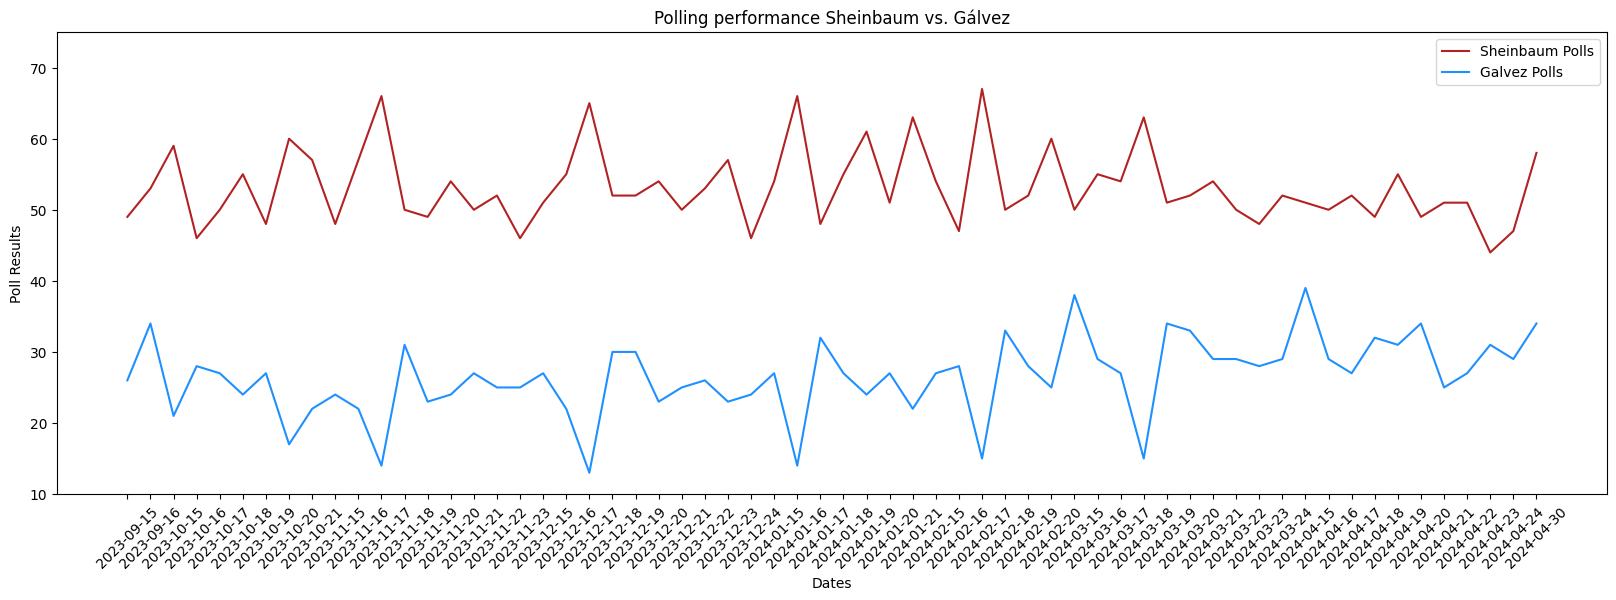

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(claudia_sample['Dates'], claudia_sample['Result'], color='firebrick', label='Sheinbaum Polls')
ax.plot(galvez_sample['Dates'], galvez_sample['Result'], color='dodgerblue', label='Galvez Polls')
ax.set_xlabel('Dates')
ax.set_ylabel('Poll Results')
ax.set_title('Polling performance Sheinbaum vs. Gálvez')
ax.set_ylim(10, 75)
plt.xticks(rotation=45)
ax.legend();

In [7]:
claudia_sample['Dates'] = pd.to_datetime(claudia_sample['Dates'])
galvez_sample['Dates'] = pd.to_datetime(galvez_sample['Dates'])

claudia_sample['YearMonth'] = claudia_sample['Dates'].dt.to_period('M')
monthly_avg_claudia = claudia_sample.groupby('YearMonth')['Result'].mean().reset_index()
monthly_avg_claudia['YearMonth'] = monthly_avg_claudia['YearMonth'].dt.to_timestamp()


galvez_sample['YearMonth'] = galvez_sample['Dates'].dt.to_period('M')
monthly_avg_galvez = galvez_sample.groupby('YearMonth')['Result'].mean().reset_index()
monthly_avg_galvez['YearMonth'] = monthly_avg_galvez['YearMonth'].dt.to_timestamp()

(0.0, 100.0)

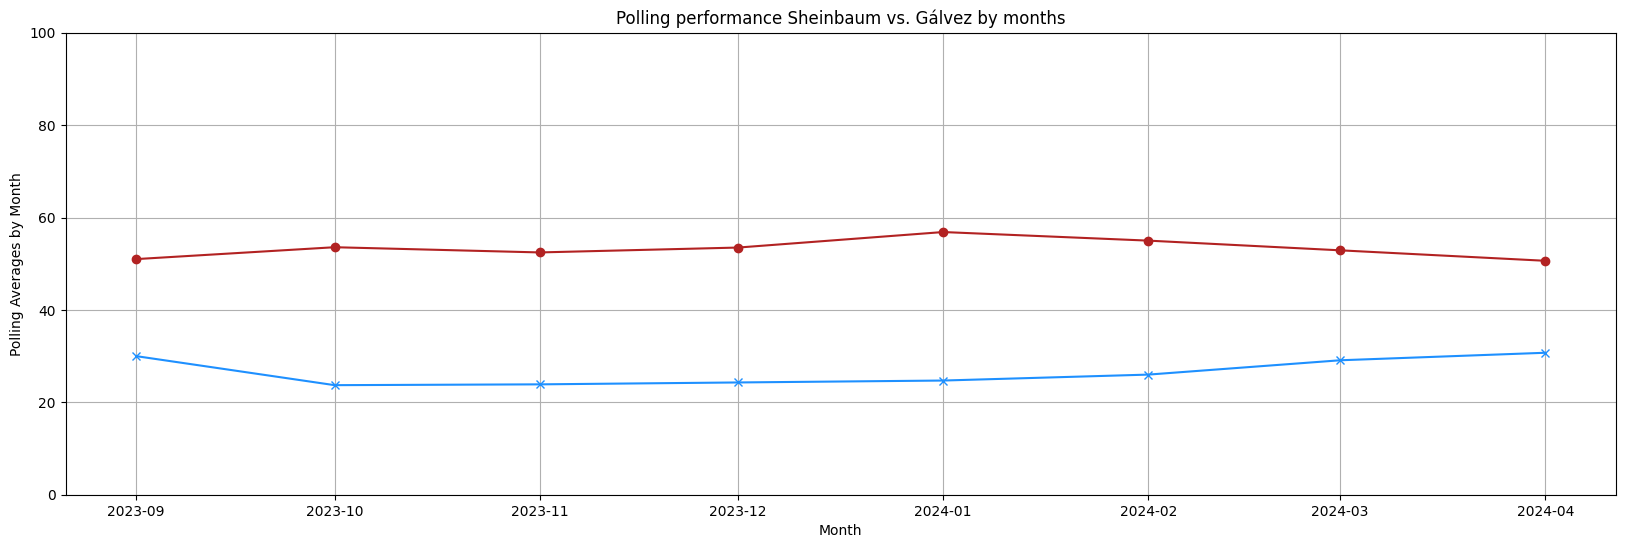

In [8]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(monthly_avg_claudia['YearMonth'], monthly_avg_claudia['Result'], marker='o', c="firebrick")
ax.plot(monthly_avg_galvez['YearMonth'], monthly_avg_galvez['Result'], marker='x', c="dodgerblue")
ax.set_title('Polling performance Sheinbaum vs. Gálvez by months')
ax.set_xlabel('Month')
ax.set_ylabel('Polling Averages by Month')
plt.grid(True)
ax.set_ylim(0, 100)

In [9]:
len(targets_claudia), len(targets_galvez), len(date_strings)

(62, 62, 62)

In [10]:
# Polls correspoding to a date
polls = ["Enkoll", "GEA-ISA", "Covarrubias", "El FInanciero", "Enkoll", "Mendoza Blanco", "Mitofsky", "Parametría", "Simo", "Buendía y Márquez", "Covarrubias", "Demotecnia", "El Financiero", "Enkoll", "Mendoza Blanco", "Mitofsky", "Parametría", "Reforma", "Berumen", "Covarrubias", "Demotecnia", "El Financiero", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Parametría", "Simo", "Citibanamex", "Berumen", "Demotecnia", "El Financiero", "Enkoll", "Mendoza Blanco", "Mitofsky", "Simo", "Berumen", "Buendía y Márquez", "Demotecnia", "El Financiero", "Mitofsky", "Simo", "Altica", "Berumen", "Covarrubias", "Demotecnia", "El Financiero", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Reforma", "Citibanamex", "Altica", "Berumen", "Covarrubias", "El Financiero", "Enkoll", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Parametría", "Citibanamex", "Final Oraculus"]


In [11]:
#Setting columns to use (see New_DB)
columns = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts', 'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost']

In [12]:
# Does every day have a poll? Does every poll have a percentage?
len(date_strings), len(targets_claudia), len(targets_galvez), len(polls)

(62, 62, 62, 62)

In [13]:
# Create a set of tuples associating dates with corresponding polls
date_poll_set_claudia = set(zip(date_strings, polls, targets_claudia))
for i, n, j in date_poll_set_claudia:
  print(f"Date: {i}, Poll: {n}, Result: {j}")

print(len(date_poll_set_claudia))

Date: 2024-04-30, Poll: Final Oraculus, Result: 58
Date: 2023-12-15, Poll: Berumen, Result: 51
Date: 2023-12-22, Poll: Parametría, Result: 53
Date: 2023-12-23, Poll: Simo, Result: 57
Date: 2023-12-20, Poll: Mendoza Blanco, Result: 54
Date: 2024-01-15, Poll: Berumen, Result: 54
Date: 2024-01-18, Poll: Enkoll, Result: 55
Date: 2024-02-16, Poll: Buendía y Márquez, Result: 47
Date: 2024-04-24, Poll: Citibanamex, Result: 47
Date: 2023-12-21, Poll: Mitofsky, Result: 50
Date: 2024-01-20, Poll: Mitofsky, Result: 51
Date: 2024-03-20, Poll: GEA-ISA, Result: 52
Date: 2023-11-18, Poll: El Financiero, Result: 50
Date: 2024-04-16, Poll: Berumen, Result: 50
Date: 2024-03-21, Poll: Mendoza Blanco, Result: 54
Date: 2023-11-22, Poll: Parametría, Result: 52
Date: 2024-03-18, Poll: Demotecnia, Result: 63
Date: 2024-03-16, Poll: Berumen, Result: 55
Date: 2023-11-21, Poll: Mitofsky, Result: 50
Date: 2024-03-17, Poll: Covarrubias, Result: 54
Date: 2024-03-24, Poll: Citibanamex, Result: 52
Date: 2024-02-15, P

In [14]:
# Create a set of tuples associating dates with corresponding polls
date_poll_set_galvez = set(zip(date_strings, polls, targets_galvez))
for i, n, j in date_poll_set_galvez:
  print(f"Date: {i}, Poll: {n}, Result: {j}")
print(len(date_poll_set_galvez))

Date: 2024-04-24, Poll: Citibanamex, Result: 29
Date: 2024-03-17, Poll: Covarrubias, Result: 27
Date: 2024-04-16, Poll: Berumen, Result: 29
Date: 2024-01-19, Poll: Mendoza Blanco, Result: 24
Date: 2023-10-17, Poll: Enkoll, Result: 27
Date: 2023-10-21, Poll: Simo, Result: 22
Date: 2023-12-24, Poll: Citibanamex, Result: 24
Date: 2024-02-15, Poll: Berumen, Result: 27
Date: 2024-04-21, Poll: Mendoza Blanco, Result: 25
Date: 2023-12-16, Poll: Covarrubias, Result: 22
Date: 2024-01-21, Poll: Simo, Result: 22
Date: 2024-04-23, Poll: Parametría, Result: 31
Date: 2023-12-23, Poll: Simo, Result: 23
Date: 2024-01-18, Poll: Enkoll, Result: 27
Date: 2024-04-18, Poll: El Financiero, Result: 32
Date: 2024-04-20, Poll: GEA-ISA, Result: 34
Date: 2023-11-19, Poll: Enkoll, Result: 23
Date: 2023-12-20, Poll: Mendoza Blanco, Result: 23
Date: 2024-01-15, Poll: Berumen, Result: 27
Date: 2024-02-20, Poll: Simo, Result: 25
Date: 2024-03-23, Poll: Reforma, Result: 28
Date: 2023-09-15, Poll: Enkoll, Result: 26
Da

### Polls for Maynez

Since he didn´t start in September but in January the 11. Would be some nicer ways to do this but will only copy without the data prior to January

In [31]:
# Dates of published polls to read (as reported by Oraculus.mx)
date_strings_maynez = ["2024-01-21", "2024-02-15", "2024-02-16", "2024-02-17", "2024-02-18", "2024-02-19", "2024-02-20", "2024-03-15", "2024-03-16", "2024-03-17", "2024-03-18", "2024-03-19", "2024-03-20", "2024-03-21", "2024-03-22", "2024-03-23", "2024-03-24", "2024-04-15",  "2024-04-16",  "2024-04-17",  "2024-04-18",  "2024-04-19",  "2024-04-20",  "2024-04-21",  "2024-04-22",  "2024-04-23",  "2024-04-24", "2024-04-30"]

targets_maynez = [4, 5, 4, 2, 8, 5, 3, 6, 4, 5, 2, 7, 4, 6, 5, 7, 5, 5, 4, 7, 8, 6, 6, 11, 9, 8, 7, 9]

# Polls correspoding to a date
polls_maynez = ["Simo", "Berumen", "Buendía y Márquez", "Demotecnia", "El Financiero", "Mitofsky", "Simo", "Altica", "Berumen", "Covarrubias", "Demotecnia", "El Financiero", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Reforma", "Citibanamex", "Altica", "Berumen", "Covarrubias", "El Financiero", "Enkoll", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Parametría", "Citibanamex", "Final Oraculus"]

In [32]:
average(targets_maynez[:len(targets_maynez)-1])

5.666666666666667

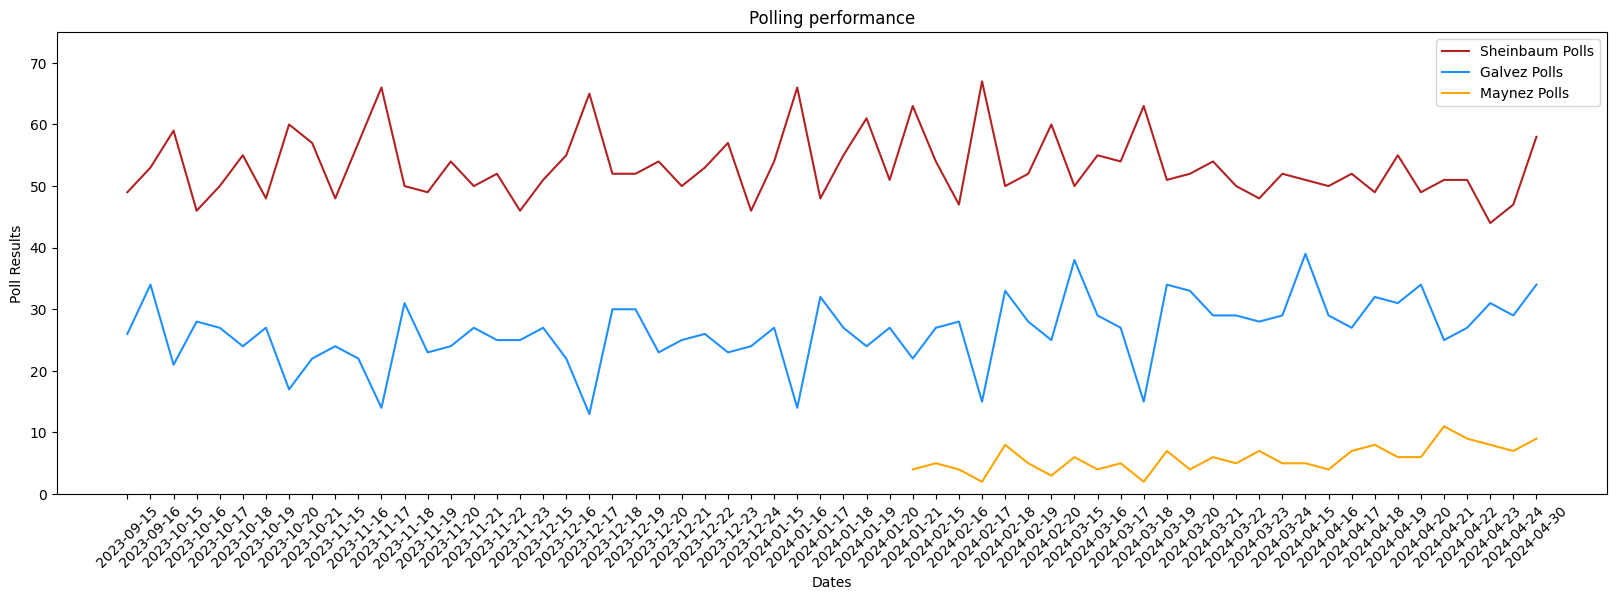

In [18]:
maynez_data = {"Dates": date_strings_maynez, "Result": targets_maynez}
maynez_sample = pd.DataFrame(maynez_data)

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(claudia_sample['Dates'], claudia_sample['Result'], color='firebrick', label='Sheinbaum Polls')
ax.plot(galvez_sample['Dates'], galvez_sample['Result'], color='dodgerblue', label='Galvez Polls')
ax.plot(maynez_sample['Dates'], maynez_sample['Result'], color='orange', label='Maynez Polls')
ax.set_xlabel('Dates')
ax.set_ylabel('Poll Results')
ax.set_title('Polling performance')
ax.set_ylim(0, 75)
plt.xticks(rotation=45)
ax.legend();

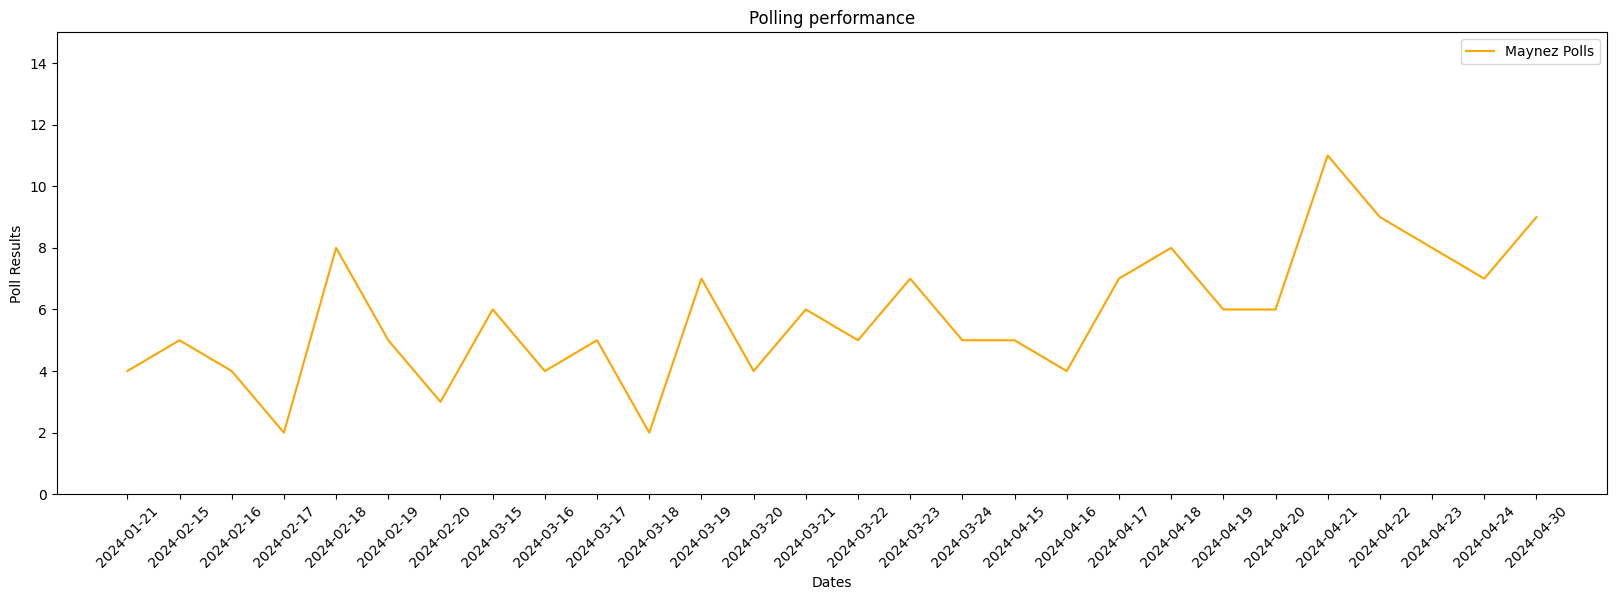

In [35]:
maynez_data = {"Dates": date_strings_maynez, "Result": targets_maynez}
maynez_sample = pd.DataFrame(maynez_data)

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(maynez_sample['Dates'], maynez_sample['Result'], color='orange', label='Maynez Polls')
ax.set_xlabel('Dates')
ax.set_ylabel('Poll Results')
ax.set_title('Polling performance')
ax.set_ylim(0, 15)
plt.xticks(rotation=45)
ax.legend();

(0.0, 60.0)

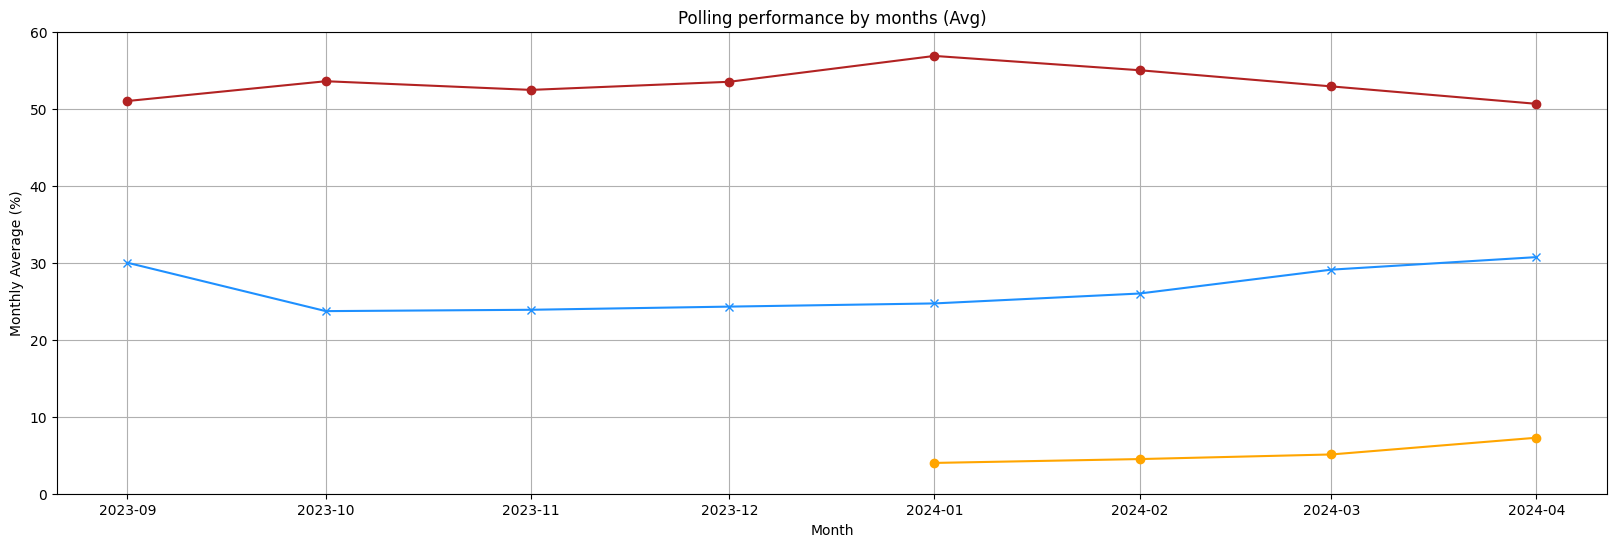

In [24]:
maynez_sample['Dates'] = pd.to_datetime(maynez_sample['Dates'])
claudia_sample['Dates'] = pd.to_datetime(claudia_sample['Dates'])
galvez_sample['Dates'] = pd.to_datetime(galvez_sample['Dates'])

maynez_sample['YearMonth'] = maynez_sample['Dates'].dt.to_period('M')
monthly_avg_maynez = maynez_sample.groupby('YearMonth')['Result'].mean().reset_index()
monthly_avg_maynez['YearMonth'] = monthly_avg_maynez['YearMonth'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(monthly_avg_claudia['YearMonth'], monthly_avg_claudia['Result'], marker='o', c="firebrick")
ax.plot(monthly_avg_galvez['YearMonth'], monthly_avg_galvez['Result'], marker='x', c="dodgerblue")
ax.plot(monthly_avg_maynez['YearMonth'], monthly_avg_maynez['Result'], marker='o', c="orange")
ax.set_title('Polling performance by months (Avg)')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Average (%)')
plt.grid(True)
ax.set_ylim(0, 60)

In [35]:
len(date_strings_maynez), len(targets_maynez), len(polls_maynez)

(28, 28, 28)

In [36]:
# Create a set of tuples associating dates with corresponding polls
date_poll_set_maynez = set(zip(date_strings_maynez, polls_maynez, targets_maynez))
for i, n, j in date_poll_set_maynez:
  print(f"Date: {i}, Poll: {n}, Result: {j}")
print(len(date_poll_set_maynez))

Date: 2024-04-19, Poll: Enkoll, Result: 6
Date: 2024-04-18, Poll: El Financiero, Result: 8
Date: 2024-03-15, Poll: Altica, Result: 6
Date: 2024-04-30, Poll: Final Oraculus, Result: 9
Date: 2024-02-15, Poll: Berumen, Result: 5
Date: 2024-04-20, Poll: GEA-ISA, Result: 6
Date: 2024-04-15, Poll: Altica, Result: 5
Date: 2024-04-21, Poll: Mendoza Blanco, Result: 11
Date: 2024-02-19, Poll: Mitofsky, Result: 5
Date: 2024-04-16, Poll: Berumen, Result: 4
Date: 2024-04-24, Poll: Citibanamex, Result: 7
Date: 2024-02-18, Poll: El Financiero, Result: 8
Date: 2024-02-20, Poll: Simo, Result: 3
Date: 2024-04-22, Poll: Mitofsky, Result: 9
Date: 2024-03-19, Poll: El Financiero, Result: 7
Date: 2024-04-17, Poll: Covarrubias, Result: 7
Date: 2024-02-17, Poll: Demotecnia, Result: 2
Date: 2024-01-21, Poll: Simo, Result: 4
Date: 2024-03-20, Poll: GEA-ISA, Result: 4
Date: 2024-03-17, Poll: Covarrubias, Result: 5
Date: 2024-03-24, Poll: Citibanamex, Result: 5
Date: 2024-03-16, Poll: Berumen, Result: 4
Date: 202

In [37]:
# File Path
file_path = "../New_DB.xlsx"
# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(file_path, skiprows=1, sheet_name=None)

# Access each DataFrame by sheet name
galvez_df = all_sheets["Galvez"]
claudia_df = all_sheets["Claudia"]
maynez_df = all_sheets["Maynez"]

# Convert 'Date' column to datetime if it's not already
galvez_df['Date'] = pd.to_datetime(galvez_df['Date'])
claudia_df['Date'] = pd.to_datetime(claudia_df['Date'])
maynez_df['Date'] = pd.to_datetime(maynez_df['Date'])

In [12]:
# How mauch data should we have?
data = len(days) * len(polls)
count = 0
for i in days:
  for x, y, z in date_poll_set_claudia:
    count += 1

print(f"We should have {data} 'records' And we have {count}")

We should have 620 'records' And we have 620


In [13]:
# CLAUDIA

# Specify the directory where you want to save the CSV files
output_directory = "../claudia"
result_dataframes = {}
for i in days:
  for x, y, z in date_poll_set_claudia:
    # Filter rows based on the established date and count the specified number of rows before that
    filtered_df = claudia_df.loc[claudia_df['Date'] < x].iloc[-i:]
    # Sum the data in the selected rows
    sum_result = filtered_df[columns].sum()
    # Turn result into a DF and Transpose
    pd_result = sum_result.to_frame().T
    #Adding metadata columns to the new sum dataframe
    pd_result['Candidate'] = 'Claudia'
    pd_result['Window'] = i
    pd_result['Ref. Date'] = x
    pd_result['Institute'] = y
    pd_result['Target'] = z
    # round the result and output
    pd_result = pd_result.round()

    # Store the dataframe in the dictionary with a meaningful key
    key = f"1_{i}_{x}_{y}"
    result_dataframes[key] = pd_result

    # Save the dataframe to a CSV file in the specified directory
    csv_filepath = os.path.join(output_directory, f"{key}.csv")
    pd_result.to_csv(csv_filepath, index=False)


In [14]:
# Specify the directory where you want to save the CSV files
output_directory = "../galvez"
result_dataframes = {}
for i in days:
  for x, y, z in date_poll_set_galvez:
    # Filter rows based on the established date and count the specified number of rows before that
    filtered_df = galvez_df.loc[galvez_df['Date'] < x].iloc[-i:]
    # Sum the data in the selected rows
    sum_result = filtered_df[columns].sum()
    # Turn result into a DF and Transpose
    pd_result = sum_result.to_frame().T
    #Adding metadata columns to the new sum dataframe
    pd_result['Candidate'] = 'Galvez'
    pd_result['Window'] = i
    pd_result['Ref. Date'] = x
    pd_result['Institute'] = y
    pd_result['Target'] = z
    # round the result and output
    pd_result = pd_result.round()

    # Store the dataframe in the dictionary with a meaningful key
    key = f"2_{i}_{x}_{y}"
    result_dataframes[key] = pd_result

    # Save the dataframe to a CSV file in the specified directory
    csv_filepath = os.path.join(output_directory, f"{key}.csv")
    pd_result.to_csv(csv_filepath, index=False)


In [38]:
# Specify the directory where you want to save the CSV files
output_directory = "../maynez"
result_dataframes = {}
for i in days:
  for x, y, z in date_poll_set_maynez:
    # Filter rows based on the established date and count the specified number of rows before that
    filtered_df = maynez_df.loc[maynez_df['Date'] < x].iloc[-i:]
    # Sum the data in the selected rows
    sum_result = filtered_df[columns].sum()
    # Turn result into a DF and Transpose
    pd_result = sum_result.to_frame().T
    #Adding metadata columns to the new sum dataframe
    pd_result['Candidate'] = 'Maynez'
    pd_result['Window'] = i
    pd_result['Ref. Date'] = x
    pd_result['Institute'] = y
    pd_result['Target'] = z
    # round the result and output
    pd_result = pd_result.round()

    # Store the dataframe in the dictionary with a meaningful key
    key = f"3_{i}_{x}_{y}"
    result_dataframes[key] = pd_result

    # Save the dataframe to a CSV file in the specified directory
    csv_filepath = os.path.join(output_directory, f"{key}.csv")
    pd_result.to_csv(csv_filepath, index=False)

We have now created single column files that correspond to each poll by a date, by candidate. We now need to join corresponding poll results categorized by window time.

In [16]:
# Set the directory where your CSV files are located
directory = '../claudia'
for i in days:

    # Specify the pattern for file names to include
    file_name_pattern = f'1_{i}_'

    # Get a list of CSV files in the directory that match the pattern
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv') and file.startswith(file_name_pattern)]

    # Ensure there are matching CSV files in the directory
    if not csv_files:
        print(f"No CSV files matching the pattern {file_name_pattern} found in the specified directory.")
    else:
        # Read the first CSV file to get the header
        first_file_path = os.path.join(directory, csv_files[0])
        df_combined = pd.read_csv(first_file_path)

        # Loop through the remaining CSV files and concatenate them
        for csv_file in csv_files[1:]:
            file_path = os.path.join(directory, csv_file)
            df = pd.read_csv(file_path)
            df_combined = pd.concat([df_combined, df], ignore_index=True)

        # Write the combined DataFrame to a new CSV file
        combined_output_path = f'../claudia/1_{i}.csv'
        df_combined.to_csv(combined_output_path, index=False)

        print(f"CSV files matching the pattern {file_name_pattern} successfully combined. Output saved to: {combined_output_path}")

CSV files matching the pattern 1_1_ successfully combined. Output saved to: ../claudia/1_1.csv
CSV files matching the pattern 1_2_ successfully combined. Output saved to: ../claudia/1_2.csv
CSV files matching the pattern 1_3_ successfully combined. Output saved to: ../claudia/1_3.csv
CSV files matching the pattern 1_4_ successfully combined. Output saved to: ../claudia/1_4.csv
CSV files matching the pattern 1_5_ successfully combined. Output saved to: ../claudia/1_5.csv
CSV files matching the pattern 1_6_ successfully combined. Output saved to: ../claudia/1_6.csv
CSV files matching the pattern 1_7_ successfully combined. Output saved to: ../claudia/1_7.csv
CSV files matching the pattern 1_14_ successfully combined. Output saved to: ../claudia/1_14.csv
CSV files matching the pattern 1_21_ successfully combined. Output saved to: ../claudia/1_21.csv
CSV files matching the pattern 1_28_ successfully combined. Output saved to: ../claudia/1_28.csv


In [17]:
# Set the directory where your CSV files are located
directory = '../galvez/'
for i in days:

    # Specify the pattern for file names to include
    file_name_pattern = f'2_{i}_'

    # Get a list of CSV files in the directory that match the pattern
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv') and file.startswith(file_name_pattern)]

    # Ensure there are matching CSV files in the directory
    if not csv_files:
        print(f"No CSV files matching the pattern {file_name_pattern} found in the specified directory.")
    else:
        # Read the first CSV file to get the header
        first_file_path = os.path.join(directory, csv_files[0])
        df_combined = pd.read_csv(first_file_path)

        # Loop through the remaining CSV files and concatenate them
        for csv_file in csv_files[1:]:
            file_path = os.path.join(directory, csv_file)
            df = pd.read_csv(file_path)
            df_combined = pd.concat([df_combined, df], ignore_index=True)

        # Write the combined DataFrame to a new CSV file
        combined_output_path = f'../galvez/2_{i}.csv'
        df_combined.to_csv(combined_output_path, index=False)

        print(f"CSV files matching the pattern {file_name_pattern} successfully combined. Output saved to: {combined_output_path}")


CSV files matching the pattern 2_1_ successfully combined. Output saved to: ../galvez/2_1.csv
CSV files matching the pattern 2_2_ successfully combined. Output saved to: ../galvez/2_2.csv
CSV files matching the pattern 2_3_ successfully combined. Output saved to: ../galvez/2_3.csv
CSV files matching the pattern 2_4_ successfully combined. Output saved to: ../galvez/2_4.csv
CSV files matching the pattern 2_5_ successfully combined. Output saved to: ../galvez/2_5.csv
CSV files matching the pattern 2_6_ successfully combined. Output saved to: ../galvez/2_6.csv
CSV files matching the pattern 2_7_ successfully combined. Output saved to: ../galvez/2_7.csv
CSV files matching the pattern 2_14_ successfully combined. Output saved to: ../galvez/2_14.csv
CSV files matching the pattern 2_21_ successfully combined. Output saved to: ../galvez/2_21.csv
CSV files matching the pattern 2_28_ successfully combined. Output saved to: ../galvez/2_28.csv


In [39]:
# Set the directory where your CSV files are located
directory = '../maynez/'
for i in days:

    # Specify the pattern for file names to include
    file_name_pattern = f'3_{i}_'

    # Get a list of CSV files in the directory that match the pattern
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv') and file.startswith(file_name_pattern)]

    # Ensure there are matching CSV files in the directory
    if not csv_files:
        print(f"No CSV files matching the pattern {file_name_pattern} found in the specified directory.")
    else:
        # Read the first CSV file to get the header
        first_file_path = os.path.join(directory, csv_files[0])
        df_combined = pd.read_csv(first_file_path)

        # Loop through the remaining CSV files and concatenate them
        for csv_file in csv_files[1:]:
            file_path = os.path.join(directory, csv_file)
            df = pd.read_csv(file_path)
            df_combined = pd.concat([df_combined, df], ignore_index=True)

        # Write the combined DataFrame to a new CSV file
        combined_output_path = f'../maynez/3_{i}.csv'
        df_combined.to_csv(combined_output_path, index=False)

        print(f"CSV files matching the pattern {file_name_pattern} successfully combined. Output saved to: {combined_output_path}")

CSV files matching the pattern 3_1_ successfully combined. Output saved to: ../maynez/3_1.csv
CSV files matching the pattern 3_2_ successfully combined. Output saved to: ../maynez/3_2.csv
CSV files matching the pattern 3_3_ successfully combined. Output saved to: ../maynez/3_3.csv
CSV files matching the pattern 3_4_ successfully combined. Output saved to: ../maynez/3_4.csv
CSV files matching the pattern 3_5_ successfully combined. Output saved to: ../maynez/3_5.csv
CSV files matching the pattern 3_6_ successfully combined. Output saved to: ../maynez/3_6.csv
CSV files matching the pattern 3_7_ successfully combined. Output saved to: ../maynez/3_7.csv
CSV files matching the pattern 3_14_ successfully combined. Output saved to: ../maynez/3_14.csv
CSV files matching the pattern 3_21_ successfully combined. Output saved to: ../maynez/3_21.csv
CSV files matching the pattern 3_28_ successfully combined. Output saved to: ../maynez/3_28.csv


This process was last updated on May 27, 2024, and a last social media cut from May 19th. A total of 64 released polls in Oraculus.mx 

The release of this dataset belongs to the research effort performed by the author of this repository, which hopes to upbring new research based on it since similar databases have not been found.